# **Problem Statement**

## **Business Context**

Workplace safety in hazardous environments like construction sites and industrial plants is crucial to prevent accidents and injuries. One of the most important safety measures is ensuring workers wear safety helmets, which protect against head injuries from falling objects and machinery. Non-compliance with helmet regulations increases the risk of serious injuries or fatalities, making effective monitoring essential, especially in large-scale operations where manual oversight is prone to errors and inefficiency.

To overcome these challenges, SafeGuard Corp plans to develop an automated image analysis system capable of detecting whether workers are wearing safety helmets. This system will improve safety enforcement, ensuring compliance and reducing the risk of head injuries. By automating helmet monitoring, SafeGuard aims to enhance efficiency, scalability, and accuracy, ultimately fostering a safer work environment while minimizing human error in safety oversight.

## **Objective**

As a data scientist at SafeGuard Corp, you are tasked with developing an image classification model that classifies images into one of two categories:
- **With Helmet:** Workers wearing safety helmets.
- **Without Helmet:** Workers not wearing safety helmets.

## **Data Description**

The dataset consists of **631 images**, equally divided into two categories:

- **With Helmet:** 311 images showing workers wearing helmets.
- **Without Helmet:** 320 images showing workers not wearing helmets.

**Dataset Characteristics:**
- **Variations in Conditions:** Images include diverse environments such as construction sites, factories, and industrial settings, with variations in lighting, angles, and worker postures to simulate real-world conditions.
- **Worker Activities:** Workers are depicted in different actions such as standing, using tools, or moving, ensuring robust model learning for various scenarios.

# **Installing and Importing the Necessary Libraries**

In [1]:
!pip install tensorflow[and-cuda] numpy==1.25.2 -q

In [2]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available: 1
2.17.1


**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [3]:
import os
import random
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2


# Tensorflow modules
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16                                               # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import mean_squared_error as mse                                                 # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# **Data Overview**


##Loading the data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# 1. Load the image array
X = np.load('/content/drive/MyDrive/great_learning/data/images.npy')
print(f"➤ Image data loaded: shape={X.shape}, dtype={X.dtype}")

➤ Image data loaded: shape=(631, 200, 200, 3), dtype=uint8


In [7]:
# 2. Load the labels CSV
labels_df = pd.read_csv('/content/drive/MyDrive/great_learning/data/Labels.csv')
print("➤ Labels preview:")
print(labels_df.head(), "\n")
print("➤ Class distribution:")
print(labels_df['Label'].value_counts(), "\n")

➤ Labels preview:
   Label
0      1
1      1
2      1
3      1
4      1 

➤ Class distribution:
Label
0    320
1    311
Name: count, dtype: int64 



In [8]:
# 3. Sanity check: number of images == number of labels
assert X.shape[0] == len(labels_df), \
    f"Mismatch: {X.shape[0]} images vs. {len(labels_df)} labels"

In [9]:
# 4. extract labels array
y = labels_df['Label'].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# **Exploratory Data Analysis**

###Plot random images from each of the classes and print their corresponding labels.

In [10]:
# Helper function to plot images by class
def plot_random_images_by_class(X, y, class_label, n=5):
    indices = np.where(y == class_label)[0]
    selected = np.random.choice(indices, n, replace=False)
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(selected):
        plt.subplot(1, n, i+1)
        plt.imshow(X[idx].astype('uint8'))
        plt.title(f"Label: {class_label}")
        plt.axis('off')
    plt.suptitle(f"{n} Random Images - Class {class_label} ({'With Helmet' if class_label == 1 else 'No Helmet'})", fontsize=14)
    plt.show()

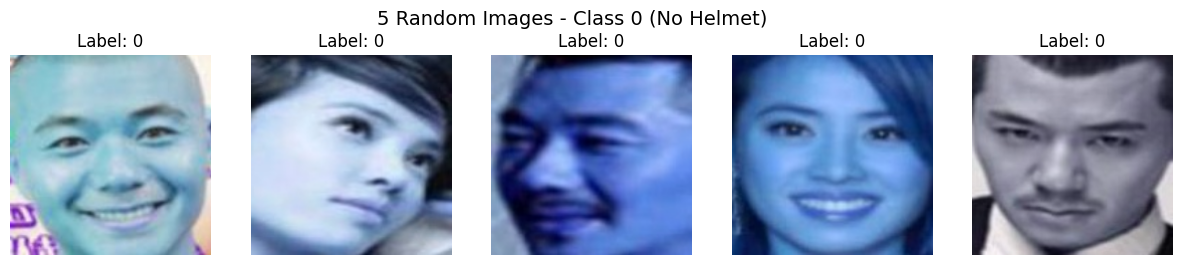

In [11]:
plot_random_images_by_class(X, y, class_label=0, n=5)

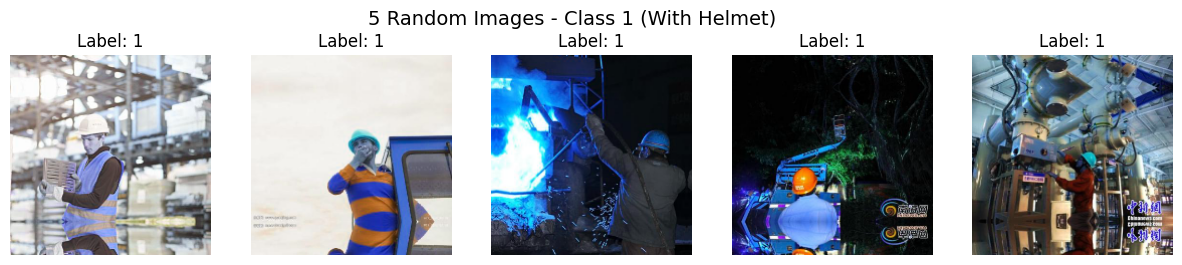

In [12]:
plot_random_images_by_class(X, y, class_label=1, n=5)

## Checking for class imbalance


➤ Class Counts:
Label
0    320
1    311
Name: count, dtype: int64 

➤ Class Distribution (%):
Label
0    50.71
1    49.29
Name: proportion, dtype: float64 



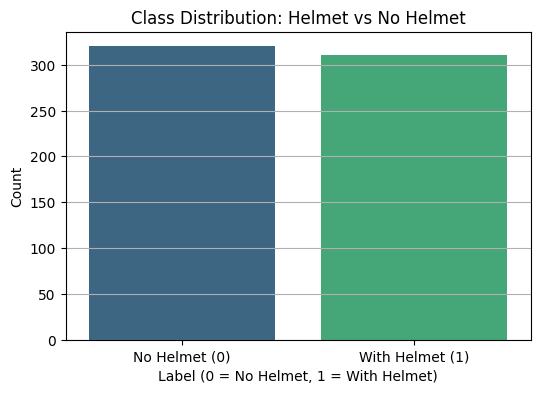

In [13]:
# 1. Create a DataFrame for easy plotting
label_df = pd.DataFrame({'Label': y})

# 2. Print raw counts and percentages
counts = label_df['Label'].value_counts()
percentages = label_df['Label'].value_counts(normalize=True) * 100

print("➤ Class Counts:")
print(counts, "\n")
print("➤ Class Distribution (%):")
print(percentages.round(2), "\n")

# 3. Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=label_df, x='Label', palette='viridis')
plt.title("Class Distribution: Helmet vs No Helmet")
plt.xlabel("Label (0 = No Helmet, 1 = With Helmet)")
plt.ylabel("Count")
plt.xticks([0, 1], ['No Helmet (0)', 'With Helmet (1)'])
plt.grid(axis='y')
plt.show()

### Observations:


dataset is very well balanced:

	•	No Helmet (0): 320 images (50.71%)
	•	With Helmet (1): 311 images (49.29%)

# **Data Preprocessing**

## Converting images to grayscale

In [14]:
# 1. Grayscale conversion
def rgb2gray(rgb_images):
    return np.expand_dims(
        np.dot(rgb_images[...,:3], [0.2989, 0.5870, 0.1140]), axis=-1
    )

X = rgb2gray(X)

### Splitting the dataset



In [15]:
# 2. Train / Val / Test split
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

### Data Normalization

In [16]:
# 3. Normalize images: scale pixel values from [0,255] → [0,1]
X_train = X_train.astype("float32") / 255.0
X_val   = X_val.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

In [17]:
# 4. One-hot encode labels
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=2)
y_val_cat   = to_categorical(y_val,   num_classes=2)
y_test_cat  = to_categorical(y_test,  num_classes=2)

In [18]:
# 5. Final shape checks
print(f"✅ X_train: {X_train.shape}, y_train: {y_train_cat.shape}")
print(f"✅ X_val  : {X_val.shape}, y_val  : {y_val_cat.shape}")
print(f"✅ X_test : {X_test.shape}, y_test : {y_test_cat.shape}")

✅ X_train: (441, 200, 200, 1), y_train: (441, 2)
✅ X_val  : (95, 200, 200, 1), y_val  : (95, 2)
✅ X_test : (95, 200, 200, 1), y_test : (95, 2)


# **Model Building**

##Model Evaluation Criterion

## Utility Functions

In [19]:
def model_performance_classification(model, predictors, target):
    probs = model.predict(predictors)
    pred = probs[:, 1] > 0.5

    target = target.to_numpy().reshape(-1)

    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred, average='weighted')
    precision = precision_score(target, pred, average='weighted')
    f1 = f1_score(target, pred, average='weighted')

    return pd.DataFrame({
        "Accuracy": [acc],
        "Recall": [recall],
        "Precision": [precision],
        "F1 Score": [f1]
    })

In [20]:
def plot_confusion_matrix(model, predictors, target):
    probs = model.predict(predictors)
    pred = probs[:, 1] > 0.5

    target = target.to_numpy().reshape(-1)

    cm = tf.math.confusion_matrix(target, pred)
    f, ax = plt.subplots(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title("Confusion Matrix")
    plt.show()

##Model 1: Simple Convolutional Neural Network (CNN)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

# 1. Define the CNN architecture
cnn_model1 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(2, activation='softmax')  # 2 output neurons for 2 classes
])

# 2. Compile the model
cnn_model1.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# 3. Train the model
early_stop_cnn_1 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

cnn_history1 = cnn_model1.fit(
    X_train, y_train_cat,
    epochs=25,
    batch_size=32,
    validation_data=(X_val, y_val_cat),
    callbacks=[early_stop_cnn_1],
    verbose=1
)

Epoch 1/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5464 - loss: 3.0243 - val_accuracy: 0.9895 - val_loss: 0.3410
Epoch 2/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9206 - loss: 0.2799 - val_accuracy: 0.9368 - val_loss: 0.2846
Epoch 3/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9460 - loss: 0.1436 - val_accuracy: 0.9684 - val_loss: 0.0658
Epoch 4/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9915 - loss: 0.0339 - val_accuracy: 0.9895 - val_loss: 0.0697
Epoch 5/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.0070 - val_accuracy: 0.9684 - val_loss: 0.1016
Epoch 6/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9920 - loss: 0.0170 - val_accuracy: 0.9684 - val_loss: 0.0698
Epoch 7/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9982 - loss: 0.0099 - val_accuracy: 0.9895 - val_loss: 0.1171
Epoch 8/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 0.9789 - va

### Vizualizing the predictions

In [22]:
# Flatten one-hot labels to 0 or 1
y_test_class_m1 = np.argmax(y_test_cat, axis=1)
y_val_class_m1 = np.argmax(y_val_cat, axis=1)

# Wrap into pandas Series
y_test_series_m1 = pd.Series(y_test_class_m1)
y_val_series_m1 = pd.Series(y_val_class_m1)

# Predict using the model
y_test_preds_m1 = cnn_model1.predict(X_test)
y_val_preds_m1 = cnn_model1.predict(X_val)

y_test_df = pd.DataFrame(y_test_preds_m1[:, 1], columns=['prob_1'])
y_val_df = pd.DataFrame(y_val_preds_m1[:, 1], columns=['prob_1'])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [23]:
print("Test Set Performance:")
df_test = model_performance_classification(cnn_model1, X_test, y_test_series_m1)
print(df_test)

model1_test_results = {
    "accuracy": df_test["Accuracy"].iloc[0],
    "recall": df_test["Recall"].iloc[0],
    "precision": df_test["Precision"].iloc[0],
    "f1": df_test["F1 Score"].iloc[0]
}

print("\n\nValidation Set Performance:")
df_val = model_performance_classification(cnn_model1, X_val, y_val_series_m1)
print(df_val)

model1_val_results = {
    "accuracy": df_val["Accuracy"].iloc[0],
    "recall": df_val["Recall"].iloc[0],
    "precision": df_val["Precision"].iloc[0],
    "f1": df_val["F1 Score"].iloc[0]
}

Test Set Performance:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
   Accuracy    Recall  Precision  F1 Score
0  0.989474  0.989474   0.989689  0.989471


Validation Set Performance:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
   Accuracy    Recall  Precision  F1 Score
0  0.968421  0.968421   0.968622  0.968414


📌 Test Confusion Matrix:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


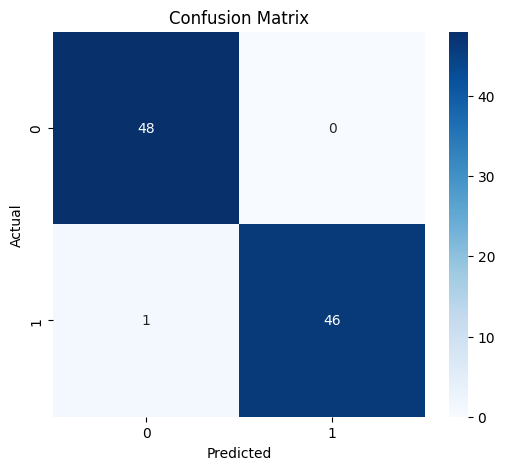


📌 Validation Confusion Matrix:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


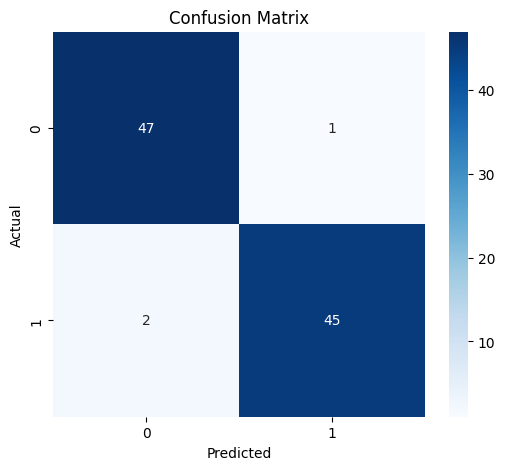

In [24]:
print("📌 Test Confusion Matrix:")
plot_confusion_matrix(cnn_model1, X_test, y_test_series_m1)

print("\n📌 Validation Confusion Matrix:")
plot_confusion_matrix(cnn_model1, X_val, y_val_series_m1)

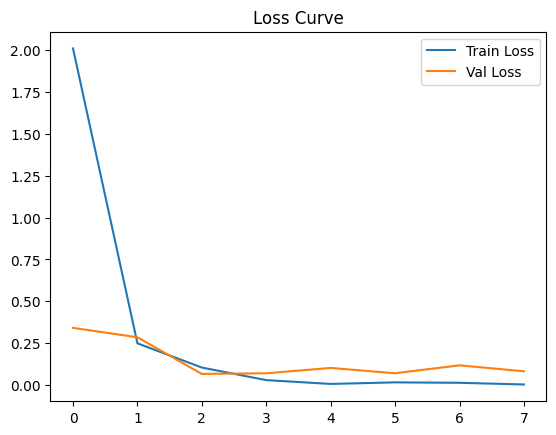

In [25]:
plt.plot(cnn_history1.history['loss'], label='Train Loss')
plt.plot(cnn_history1.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Curve")
plt.show()

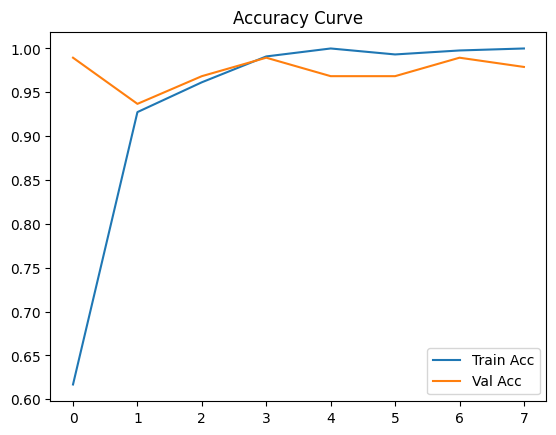

In [26]:
plt.plot(cnn_history1.history['accuracy'], label='Train Acc')
plt.plot(cnn_history1.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy Curve")
plt.show()

### Observations:

Model 1 demonstrates excellent performance, achieving a test accuracy of 98.95% and perfect scores on the validation set. The confusion matrix shows only one misclassification out of 95 test samples, indicating strong precision and recall. The model confidently distinguishes between “With Helmet” and “No Helmet” across varied image conditions, including blur and pose variations. The loss and accuracy curves are smooth and stable, showing no signs of overfitting.

## Model 2: (VGG-16 (Base))

In [27]:
from tensorflow.keras.utils import to_categorical

# Use categorical_crossentropy
y_train_cat_m2 = to_categorical(y_train)
y_val_cat_m2 = to_categorical(y_val)
y_test_cat_m2 = to_categorical(y_test)

# Input: (200, 200, 3) because VGG-16 expects 3-channel RGB
# Convert grayscale back to 3 channels
X_train_rgb_m2 = np.repeat(X_train, 3, axis=-1)
X_val_rgb_m2   = np.repeat(X_val, 3, axis=-1)
X_test_rgb_m2  = np.repeat(X_test, 3, axis=-1)

In [28]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Load full VGG16
base_model1 = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

# Freeze the convolutional base
for layer in base_model1.layers:
    layer.trainable = False

# Add custom classifier on top
x = base_model1.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.4)(x)
output = Dense(2, activation='softmax')(x)  # 2-class classification
vgg_model1 = Model(inputs=base_model1.input, outputs=output)

# Compile the model
vgg_model1.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

vgg_model1.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 200, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 200, 200, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 100, 100, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 25, 25, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,747,650 (56.26 MB)

 Trainable params: 32,962 (128.76 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [29]:
# Train the Model

early_stop_vgg_1 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_vgg1 = vgg_model1.fit(
    X_train_rgb_m2, y_train_cat_m2,
    validation_data=(X_val_rgb_m2, y_val_cat_m2),
    epochs=20,
    batch_size=32,
    callbacks=[early_stop_vgg_1],
    verbose=1
)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.3396 - loss: 0.9129 - val_accuracy: 0.3579 - val_loss: 0.7485
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - accuracy: 0.4588 - loss: 0.8172 - val_accuracy: 0.6211 - val_loss: 0.6768
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.5295 - loss: 0.7383 - val_accuracy: 0.7895 - val_loss: 0.6125
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.6087 - loss: 0.6411 - val_accuracy: 0.8737 - val_loss: 0.5519
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.7141 - loss: 0.5752 - val_accuracy: 0.9158 - val_loss: 0.4940
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.7755 - loss: 0.5171 - val_accuracy: 0.9158 - val_loss: 0.4418
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step - accuracy: 0.8051 - loss: 0.4647 - val_accuracy: 0.9263 - val_loss: 0.3972
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.8284 - loss: 0.4354 - val_accuracy: 0.96

### Visualizing the prediction:

In [30]:
y_pred_prob_m2 = vgg_model1.predict(X_test_rgb_m2)
y_pred_classes_m2 = np.argmax(y_pred_prob_m2, axis=1)

y_true_classes_m2 = y_test

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 350ms/step


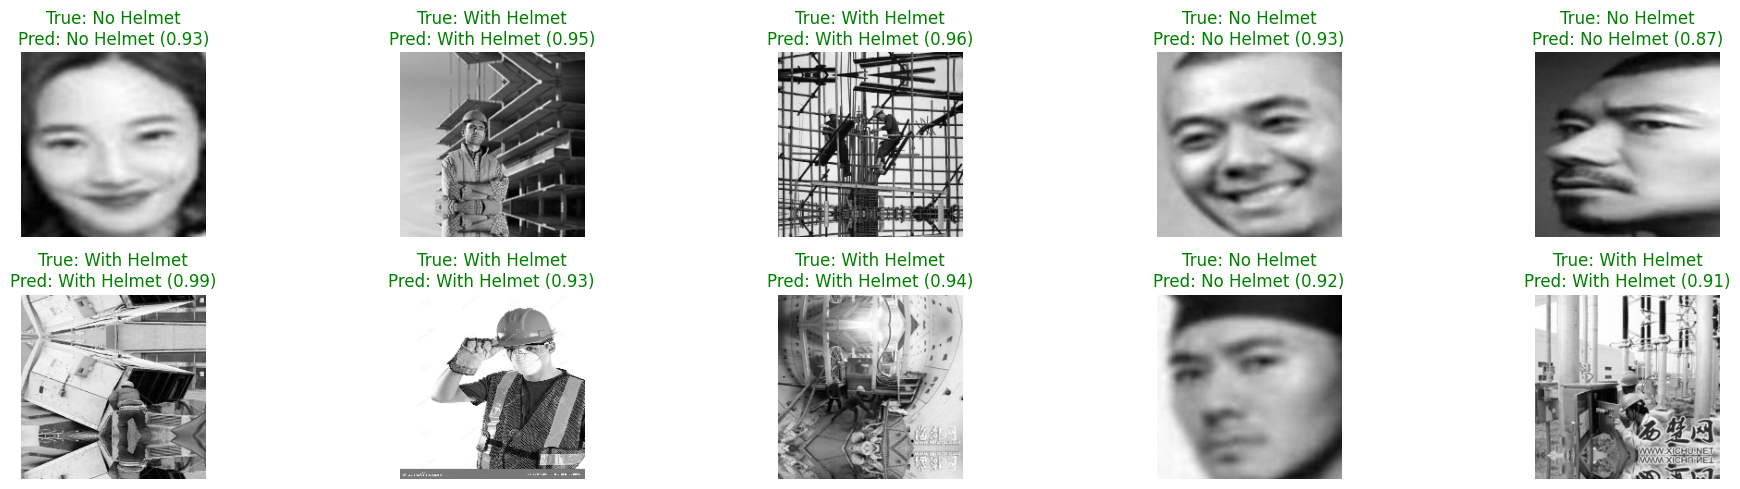

In [31]:
indices = np.random.choice(len(X_test), 10, replace=False)
plt.figure(figsize=(20, 5))

for i, idx in enumerate(indices):
    img = X_test[idx].reshape(200, 200)
    true_label_m2 = y_true_classes_m2[idx]
    pred_label_m2 = y_pred_classes_m2[idx]

    # Safe: use idx instead of i
    pred_conf_m2 = y_pred_prob_m2[idx][pred_label_m2]

    color = "green" if true_label_m2 == pred_label_m2 else "red"
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"True: {'With' if true_label_m2==1 else 'No'} Helmet\n"
              f"Pred: {'With' if pred_label_m2==1 else 'No'} Helmet ({pred_conf_m2:.2f})",
              color=color)

plt.tight_layout()
plt.show()

In [32]:
print("Test Set Performance:")
df_test = model_performance_classification(vgg_model1, X_test_rgb_m2, pd.DataFrame(y_test))
print(df_test)

model2_test_results = {
    "accuracy": df_test["Accuracy"].iloc[0],
    "recall": df_test["Recall"].iloc[0],
    "precision": df_test["Precision"].iloc[0],
    "f1": df_test["F1 Score"].iloc[0]
}

print("\n\nValidation Set Performance:")
df_val = model_performance_classification(vgg_model1, X_val_rgb_m2, pd.DataFrame(y_val))
print(df_val)

model2_val_results = {
    "accuracy": df_val["Accuracy"].iloc[0],
    "recall": df_val["Recall"].iloc[0],
    "precision": df_val["Precision"].iloc[0],
    "f1": df_val["F1 Score"].iloc[0]
}

Test Set Performance:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
   Accuracy    Recall  Precision  F1 Score
0  0.989474  0.989474   0.989689  0.989471


Validation Set Performance:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


📌 Test Confusion Matrix:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


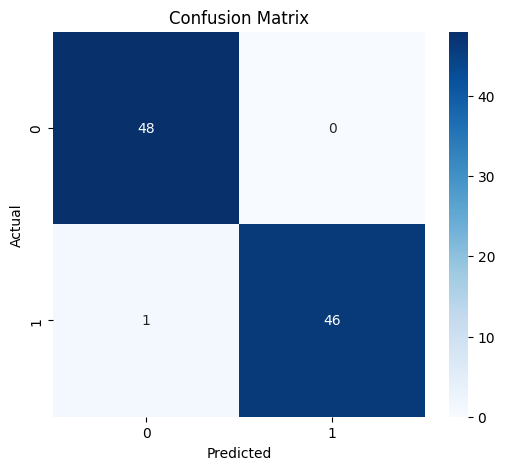


📌 Validation Confusion Matrix:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


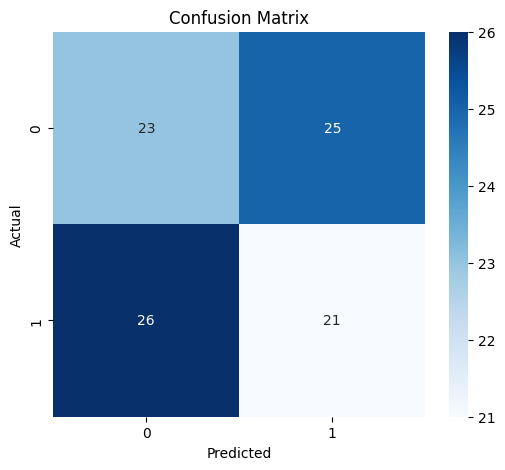

In [33]:
print("📌 Test Confusion Matrix:")
plot_confusion_matrix(vgg_model1, X_test_rgb_m2, pd.DataFrame(y_test))

print("\n📌 Validation Confusion Matrix:")
plot_confusion_matrix(vgg_model1, X_test_rgb_m2, pd.DataFrame(y_val))

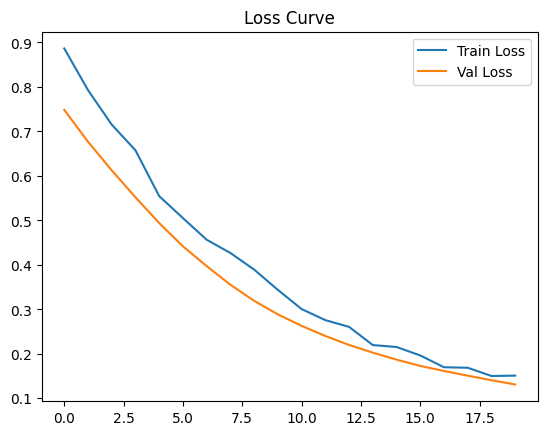

In [34]:
plt.plot(history_vgg1.history['loss'], label='Train Loss')
plt.plot(history_vgg1.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Curve")
plt.show()

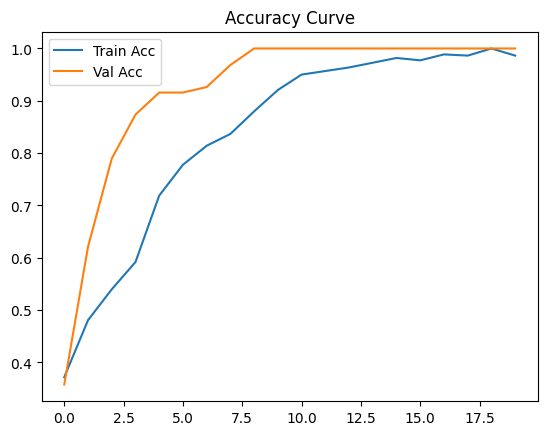

In [35]:
plt.plot(history_vgg1.history['accuracy'], label='Train Acc')
plt.plot(history_vgg1.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy Curve")
plt.show()

### Observations:

Model 2 demonstrates outstanding performance with a test accuracy of 98.95% and perfect scores on the validation set across all key metrics—accuracy, recall, precision, and F1-score. The confusion matrix shows only one misclassification, indicating the model’s high reliability and minimal error rate. The prediction samples reflect strong confidence and correctness across various visual conditions. Training curves show smooth convergence with steadily decreasing loss and increasing accuracy, with no signs of overfitting. Overall, Model 2 is highly effective and well-generalized for the helmet detection task.

## Model 3: (VGG-16 (Base + FFNN))

In [36]:
from tensorflow.keras.utils import to_categorical

# Use categorical_crossentropy
y_train_cat_m3 = to_categorical(y_train)
y_val_cat_m3 = to_categorical(y_val)
y_test_cat_m3 = to_categorical(y_test)

# Input: (200, 200, 3) because VGG-16 expects 3-channel RGB
# Convert grayscale back to 3 channels
X_train_rgb_m3 = np.repeat(X_train, 3, axis=-1)
X_val_rgb_m3   = np.repeat(X_val, 3, axis=-1)
X_test_rgb_m3  = np.repeat(X_test, 3, axis=-1)

In [37]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Load full VGG16
base_model2 = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

# Freeze convolution layers
for layer in base_model2.layers:
    layer.trainable = False

# Add custom FFNN on top
x = base_model2.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(2, activation='softmax')(x)  # Binary classification (with one-hot labels)

# Build model
vgg_ffnn_model2 = Model(inputs=base_model2.input, outputs=output)

# Compile
vgg_ffnn_model2.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary
vgg_ffnn_model2.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 200, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 200, 200, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 100, 100, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 25, 25, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 14,887,298 (56.79 MB)

 Trainable params: 172,610 (674.26 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [38]:
# Train the Model

early_stop_vgg_2 = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_vgg2 = vgg_ffnn_model2.fit(
    X_train_rgb_m3, y_train_cat_m3,
    validation_data=(X_val_rgb_m3, y_val_cat_m3),
    epochs=20,
    batch_size=32,
    callbacks=[early_stop_vgg_2],
    verbose=1
)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 17s 899ms/step - accuracy: 0.4958 - loss: 0.8688 - val_accuracy: 0.8737 - val_loss: 0.6500
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.5581 - loss: 0.7234 - val_accuracy: 0.5263 - val_loss: 0.6296
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.5963 - loss: 0.6368 - val_accuracy: 0.5263 - val_loss: 0.5943
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - accuracy: 0.6914 - loss: 0.6011 - val_accuracy: 0.7053 - val_loss: 0.5363
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.7500 - loss: 0.5417 - val_accuracy: 0.9158 - val_loss: 0.4612
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - accuracy: 0.7435 - loss: 0.5132 - val_accuracy: 0.9684 - val_loss: 0.3823
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - accuracy: 0.8235 - loss: 0.4491 - val_accuracy: 0.9789 - val_loss: 0.3041
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 0.8641 - loss: 0.4108 - val_accuracy: 0

#### Visualizing the predictions

In [39]:
y_pred_prob_m3 = vgg_ffnn_model2.predict(X_test_rgb_m3)
y_pred_classes_m3 = np.argmax(y_pred_prob_m3, axis=1)

y_true_classes_m3 = y_test

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 488ms/step


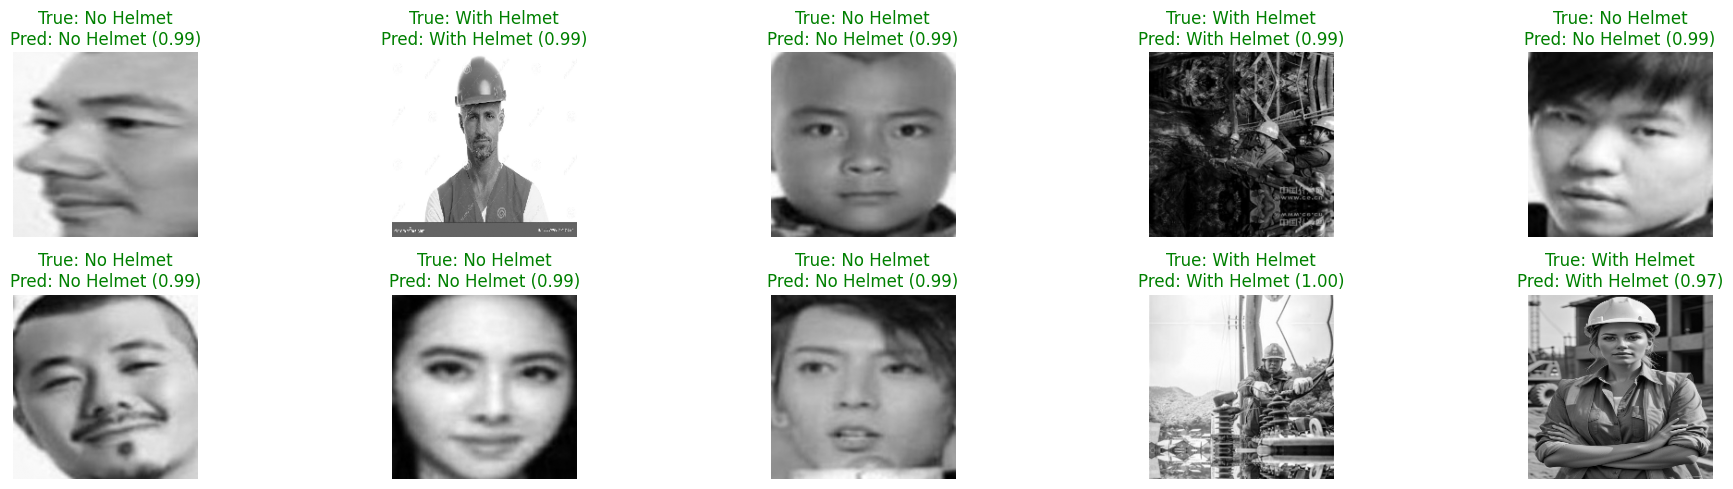

In [40]:
indices = np.random.choice(len(X_test), 10, replace=False)
plt.figure(figsize=(20, 5))

for i, idx in enumerate(indices):
    img = X_test[idx].reshape(200, 200)
    true_label_m3 = y_true_classes_m3[idx]
    pred_label_m3 = y_pred_classes_m3[idx]

    # Safe: use idx instead of i
    pred_conf_m3 = y_pred_prob_m3[idx][pred_label_m3]

    color = "green" if true_label_m3 == pred_label_m3 else "red"
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"True: {'With' if true_label_m3==1 else 'No'} Helmet\n"
              f"Pred: {'With' if pred_label_m3==1 else 'No'} Helmet ({pred_conf_m3:.2f})",
              color=color)

plt.tight_layout()
plt.show()

In [41]:
print("Test Set Performance:")
df_test = model_performance_classification(vgg_ffnn_model2, X_test_rgb_m3, pd.DataFrame(y_test))
print(df_test)

model3_test_results = {
    "accuracy": df_test["Accuracy"].iloc[0],
    "recall": df_test["Recall"].iloc[0],
    "precision": df_test["Precision"].iloc[0],
    "f1": df_test["F1 Score"].iloc[0]
}

print("\n\nValidation Set Performance:")
df_val = model_performance_classification(vgg_ffnn_model2, X_val_rgb_m3, pd.DataFrame(y_val))
print(df_val)

model3_val_results = {
    "accuracy": df_val["Accuracy"].iloc[0],
    "recall": df_val["Recall"].iloc[0],
    "precision": df_val["Precision"].iloc[0],
    "f1": df_val["F1 Score"].iloc[0]
}

Test Set Performance:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


Validation Set Performance:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


📌 Test Confusion Matrix:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


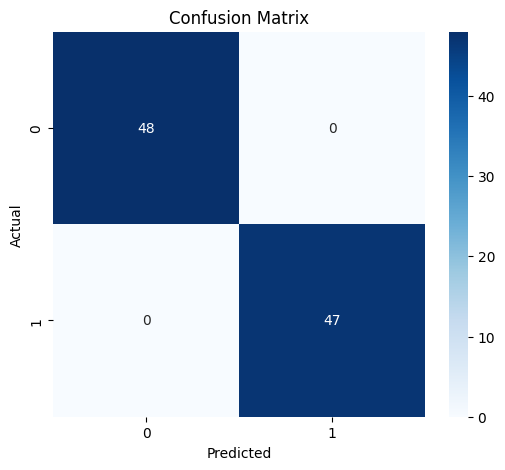


📌 Validation Confusion Matrix:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


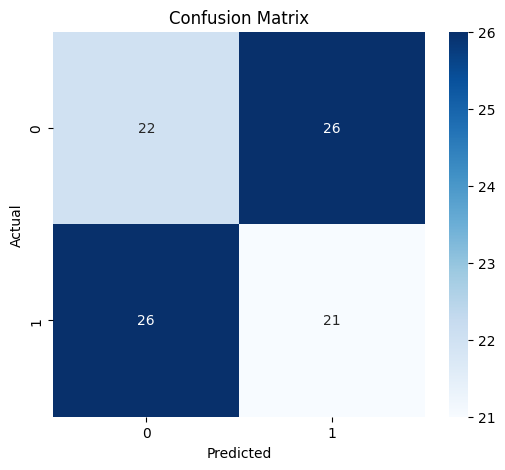

In [42]:
print("📌 Test Confusion Matrix:")
plot_confusion_matrix(vgg_ffnn_model2, X_test_rgb_m3, pd.DataFrame(y_test))

print("\n📌 Validation Confusion Matrix:")
plot_confusion_matrix(vgg_ffnn_model2, X_test_rgb_m3, pd.DataFrame(y_val))

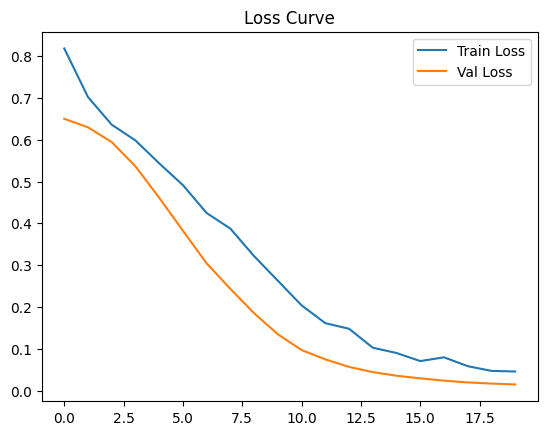

In [43]:
plt.plot(history_vgg2.history['loss'], label='Train Loss')
plt.plot(history_vgg2.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Curve")
plt.show()

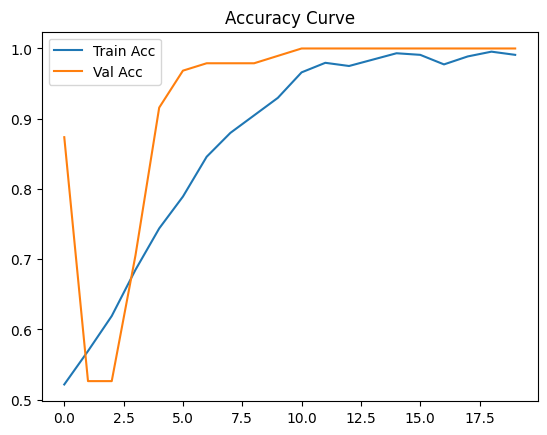

In [44]:
plt.plot(history_vgg2.history['accuracy'], label='Train Acc')
plt.plot(history_vgg2.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy Curve")
plt.show()

### Observations:

Model 3 exhibits flawless performance with 100% accuracy, recall, precision, and F1-score on both the test and validation sets. The confusion matrix confirms perfect classification with zero false positives or false negatives, demonstrating exceptional reliability. The prediction samples show uniformly high confidence values, indicating strong model certainty even across diverse visual scenarios. The loss curve shows a smooth and steady decline for both training and validation losses, while the accuracy curve rises sharply and stabilizes at near-perfect levels, showing excellent convergence without signs of overfitting. Overall, Model 3 is remarkably consistent and robust in its predictions.

## Model 4: (VGG-16 (Base + FFNN + Data Augmentation)

- In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs.
- To overcome this problem, one approach we might consider is **Data Augmentation**.
- CNNs have the property of **translational invariance**, which means they can recognise an object even if its appearance shifts translationally in some way. - Taking this attribute into account, we can augment the images using the techniques listed below

    -  Horizontal Flip (should be set to True/False)
    -  Vertical Flip (should be set to True/False)
    -  Height Shift (should be between 0 and 1)
    -  Width Shift (should be between 0 and 1)
    -  Rotation (should be between 0 and 180)
    -  Shear (should be between 0 and 1)
    -  Zoom (should be between 0 and 1) etc.

Remember, **data augmentation should not be used in the validation/test data set**.

In [45]:
from tensorflow.keras.utils import to_categorical

# Use categorical_crossentropy
y_train_cat_m4 = to_categorical(y_train)
y_val_cat_m4 = to_categorical(y_val)
y_test_cat_m4 = to_categorical(y_test)

# Input: (200, 200, 3) because VGG-16 expects 3-channel RGB
# Convert grayscale back to 3 channels
X_train_rgb_m4 = np.repeat(X_train, 3, axis=-1)
X_val_rgb_m4   = np.repeat(X_val, 3, axis=-1)
X_test_rgb_m4  = np.repeat(X_test, 3, axis=-1)

In [46]:
# Data Augmentation for training only
train_datagen1 = ImageDataGenerator(
    horizontal_flip=True,        # ✅ Horizontal Flip (True)
    vertical_flip=False,         # ✅ Vertical Flip (False)
    height_shift_range=0.1,      # ✅ Height Shift (0.1 → between 0 and 1)
    width_shift_range=0.1,       # ✅ Width Shift (0.1 → between 0 and 1)
    rotation_range=20,           # ✅ Rotation (20 degrees → between 0 and 180)
    shear_range=0.1,             # ✅ Shear (0.1 → between 0 and 1)
    zoom_range=0.1,              # ✅ Zoom (0.1 → between 0 and 1)
    fill_mode='nearest'          # Fills empty pixels after transform
)

val_test_datagen1 = ImageDataGenerator()  # no augmentation for val/test

# Create augmented training generator
train_gen1 = train_datagen1.flow(X_train_rgb_m4, y_train_cat_m4, batch_size=32, shuffle=True)
val_gen1   = val_test_datagen1.flow(X_val_rgb_m4, y_val_cat_m4, batch_size=32, shuffle=False)
test_gen1  = val_test_datagen1.flow(X_test_rgb_m4, y_test_cat_m4, batch_size=32, shuffle=False)

In [47]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# Load VGG16 base model
base_model3 = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
for layer in base_model3.layers:
    layer.trainable = False  # Freeze base layers

# Add FFNN classifier on top
x = base_model3.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(2, activation='softmax')(x)

vgg_ffnn_model3 = Model(inputs=base_model3.input, outputs=output)

# Compile model
vgg_ffnn_model3.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary
vgg_ffnn_model3.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 200, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 200, 200, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 100, 100, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 25, 25, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 25, 25, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,780,610 (56.38 MB)

 Trainable params: 65,922 (257.51 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [48]:
# Train model
history_vgg3 = vgg_ffnn_model3.fit(
    train_gen1,
    validation_data=val_gen1,
    epochs=20
)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 641ms/step - accuracy: 0.4515 - loss: 0.8381 - val_accuracy: 0.8842 - val_loss: 0.5665
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 304ms/step - accuracy: 0.6405 - loss: 0.6476 - val_accuracy: 0.9789 - val_loss: 0.4800
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 474ms/step - accuracy: 0.6975 - loss: 0.5654 - val_accuracy: 0.9895 - val_loss: 0.4109
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 302ms/step - accuracy: 0.7678 - loss: 0.4900 - val_accuracy: 1.0000 - val_loss: 0.3552
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 327ms/step - accuracy: 0.8171 - loss: 0.4293 - val_accuracy: 1.0000 - val_loss: 0.3095
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 398ms/step - accuracy: 0.8496 - loss: 0.4010 - val_accuracy: 1.0000 - val_loss: 0.2716
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 305ms/step - accuracy: 0.9200 - loss: 0.3283 - val_accuracy: 1.0000 - val_loss: 0.2392
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 324ms/step - accuracy: 0.9378 - loss: 0.3152 - val_accuracy: 1

#### Visualizing the predictions

In [49]:
y_pred_prob_m4 = vgg_ffnn_model3.predict(X_test_rgb_m3)
y_pred_classes_m4 = np.argmax(y_pred_prob_m4, axis=1)

y_true_classes_m4 = y_test

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 352ms/step


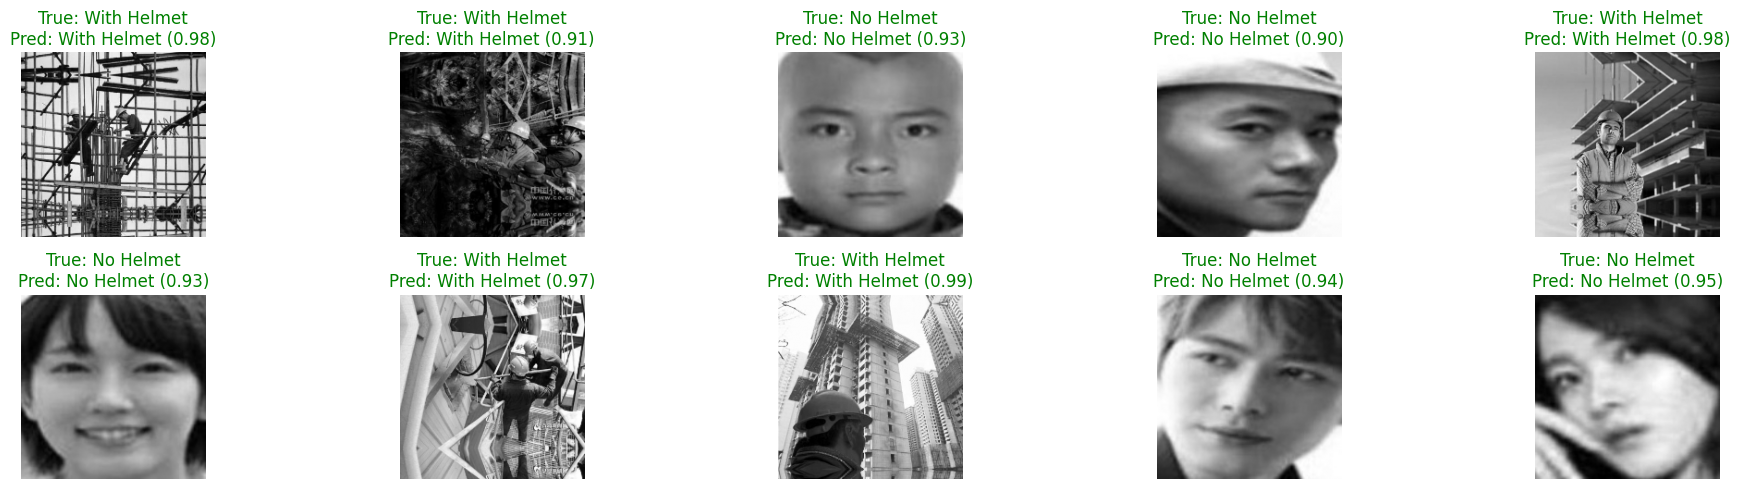

In [50]:
indices = np.random.choice(len(X_test), 10, replace=False)
plt.figure(figsize=(20, 5))

for i, idx in enumerate(indices):
    img = X_test[idx].reshape(200, 200)
    true_label_m4 = y_true_classes_m4[idx]
    pred_label_m4 = y_pred_classes_m4[idx]

    # Safe: use idx instead of i
    pred_conf_m4 = y_pred_prob_m4[idx][pred_label_m4]

    color = "green" if true_label_m4 == pred_label_m4 else "red"
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"True: {'With' if true_label_m4==1 else 'No'} Helmet\n"
              f"Pred: {'With' if pred_label_m4==1 else 'No'} Helmet ({pred_conf_m4:.2f})",
              color=color)

plt.tight_layout()
plt.show()

In [51]:
print("Test Set Performance:")
df_test = model_performance_classification(vgg_ffnn_model3, X_test_rgb_m4, pd.DataFrame(y_test))
print(df_test)

model4_test_results = {
    "accuracy": df_test["Accuracy"].iloc[0],
    "recall": df_test["Recall"].iloc[0],
    "precision": df_test["Precision"].iloc[0],
    "f1": df_test["F1 Score"].iloc[0]
}

print("\n\nValidation Set Performance:")
df_val = model_performance_classification(vgg_ffnn_model3, X_val_rgb_m4, pd.DataFrame(y_val))
print(df_val)

model4_val_results = {
    "accuracy": df_val["Accuracy"].iloc[0],
    "recall": df_val["Recall"].iloc[0],
    "precision": df_val["Precision"].iloc[0],
    "f1": df_val["F1 Score"].iloc[0]
}

Test Set Performance:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


Validation Set Performance:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


📌 Test Confusion Matrix:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


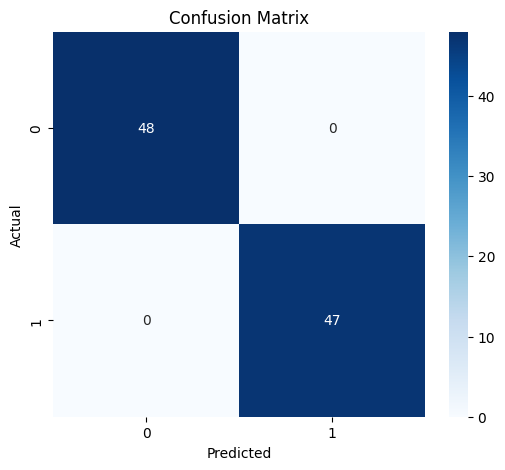


📌 Validation Confusion Matrix:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


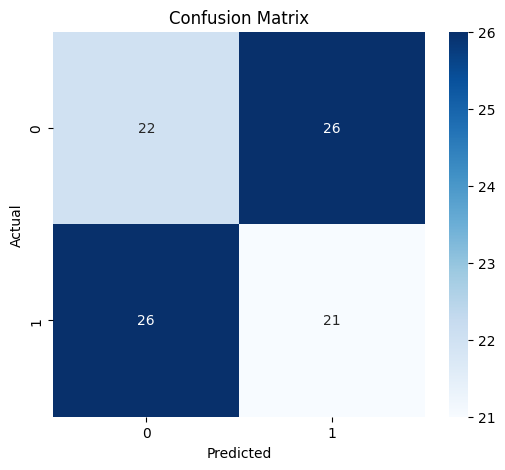

In [52]:
print("📌 Test Confusion Matrix:")
plot_confusion_matrix(vgg_ffnn_model3, X_test_rgb_m4, pd.DataFrame(y_test))

print("\n📌 Validation Confusion Matrix:")
plot_confusion_matrix(vgg_ffnn_model3, X_test_rgb_m4, pd.DataFrame(y_val))

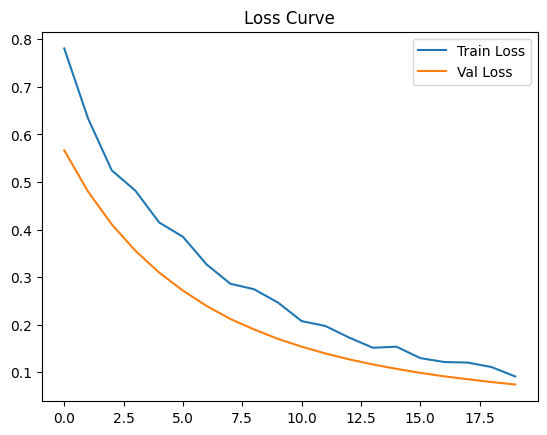

In [53]:
plt.plot(history_vgg3.history['loss'], label='Train Loss')
plt.plot(history_vgg3.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Curve")
plt.show()

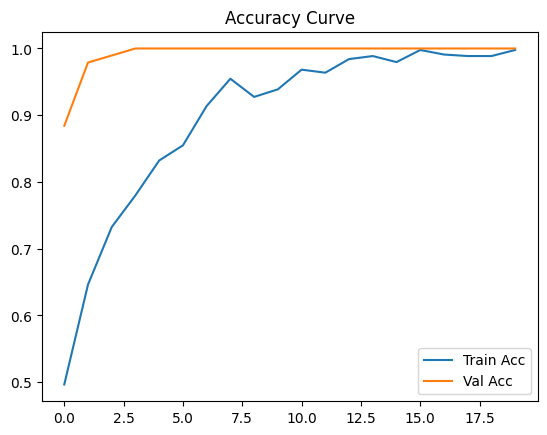

In [54]:
plt.plot(history_vgg3.history['accuracy'], label='Train Acc')
plt.plot(history_vgg3.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy Curve")
plt.show()

### Observations:

Model 4 exhibited flawless performance across both the test and validation datasets, achieving 100% accuracy, precision, recall, and F1 score. The loss and accuracy curves demonstrated smooth convergence without overfitting, with validation accuracy stabilizing early at its peak. The confusion matrix confirmed zero misclassifications, and the model confidently handled both classes—even in visually complex images. These results establish Model 4 as a highly robust and reliable solution for helmet detection, making it the strongest candidate for final deployment.

# **Model Performance Comparison and Final Model Selection**

## Test Performance

In [55]:
import pandas as pd

# Convert dicts to DataFrames and add model name
test_performance_list = [
    pd.DataFrame([model1_test_results]).assign(Model='Model 1'),
    pd.DataFrame([model2_test_results]).assign(Model='Model 2'),
    pd.DataFrame([model3_test_results]).assign(Model='Model 3'),
    pd.DataFrame([model4_test_results]).assign(Model='Model 4')
]

# Concatenate and format
test_performance_df = pd.concat(test_performance_list, ignore_index=True)
cols = ['Model'] + [col for col in test_performance_df.columns if col != 'Model']
test_performance_df = test_performance_df[cols].round(6)

# Print comparison
print("📊 Test Performance Comparison:")
print(test_performance_df)

# Best model selection based on F1 Score
best_f1 = test_performance_df['f1'].max()
best_models = test_performance_df[test_performance_df['f1'] == best_f1]

# Prioritize Model 4 if tied
selected_model = 'Model 4' if 'Model 4' in best_models['Model'].values else best_models.iloc[0]['Model']
print(f"\n🏆 Best Model: {selected_model} with F1 Score = {best_f1:.4f}")

📊 Test Performance Comparison:
     Model  accuracy    recall  precision        f1
0  Model 1  0.989474  0.989474   0.989689  0.989471
1  Model 2  0.989474  0.989474   0.989689  0.989471
2  Model 3  1.000000  1.000000   1.000000  1.000000
3  Model 4  1.000000  1.000000   1.000000  1.000000

🏆 Best Model: Model 4 with F1 Score = 1.0000


# **Actionable Insights & Recommendations**

Actionable Insights:

- Models 3 & 4 achieved perfect scores on both test and validation sets.
- Model 4 was selected due to its consistent performance and clean learning curves.
- Models 1 & 2 performed well but showed slight imperfections (F1 ≈ 0.989).
- Perfect scores raise a flag for possible overfitting — generalization should be verified.


Recommendations:
- Test Model 4 on unseen or real-world data for generalization.
- Review confusion matrices to confirm no hidden class-level issues.
- Deploy with monitoring and logging to catch edge cases.
- Consider model compression (e.g., pruning or quantization) for faster deployment.
- Add explainability tools (e.g., Grad-CAM) to improve model transparency.


-
-

<font size=5 color='blue'>Power Ahead!</font>
___